In [123]:
import numpy as np
import pandas as pd
import scanpy as sc
#from scanpy import utils
import re
import collections
from matplotlib.colors import LinearSegmentedColormap

import sys
import palantir
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use
import pickle
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import font_manager
import csv

In [124]:
#Set file directory to import from and date
filedir = '/Users/4472241/scCode/redoEntirePipeline_05-05-2021/standard_pipeline_withHarmony/'
date = '05-07-2021'
# Inline plotting
%matplotlib inline

In [125]:
rdsList = ['LTB3966', 'LTB4121', 'LTB6169','4J003',
                 '4K001', '4Q001', '5E001','5H001', 'SF100109106293', 'SF100109111451',
                 'SF100109110236', 'SF14040100158', 'SF14060200025',
                 'SF12062800475', 'SF14072200012', 'SF13061200056',
                 '4S001','2V001', 'SF14101000049',
                 'SF16112900158', '6AE001', '6AC001',
                 'SF100109101914','SF12042500035', '6AD001',
                 'SF12092600014','SF14031800065', 'SF14050700419',
                 'SF16026800045', 'SF16072200003', 'SF16112300029',
                 'SF13032800016', 'SF14110400108', 'SF14111400033',
                 'SF14092500135', 'SF14061300036', 'SF14080400065',
                 'SF15010200008', 'SF13070900171', 'SettyPt1', 'SettyPt2', 'SettyPt3',
                  'CD34', 'HuaPt1', 'HuaPt2', 'HuaPt3', 'HuaPt4']

In [126]:
#Import csv
file=pd.read_csv(filedir+'CellBreakdown_PerClusterPerType_standard_pipeline_withHarmony_res-0.1_05-07-2021.csv', index_col=0)
matrix  = np.zeros((47,12))

x = file['type']

rowOld = -1
for i in range(1, len(x)):
    #where do we put this sample
    row = rdsList.index(x[i])
    matrix[row,file['cluster'][i]-1] = file['Fraction'][i]
    rowOld = row
    


In [127]:
orderingAllSamples = [5,6,7,17,32,33,35,36,37,39,34,38,1,2,3,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,4, 40, 41, 42, 43,44,45,46, 47]
orderedMatrix = np.zeros((len(orderingAllSamples),12))
namesList = list()
count=0
for i in orderingAllSamples:
    orderedMatrix[count,:] = matrix[i-1,:]
    namesList.append(rdsList[i-1])
    count = count+1

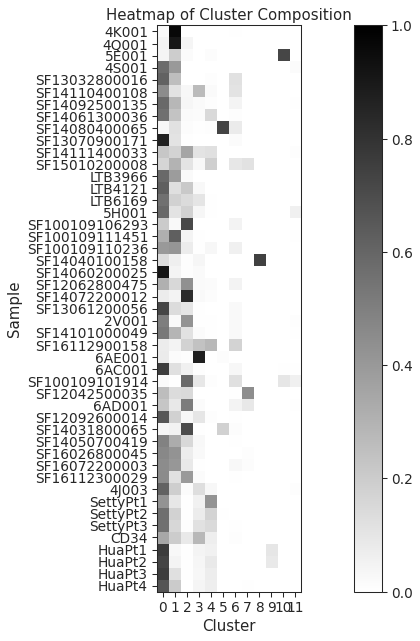

In [128]:
#Set figure size and resolution
plt.rcParams['figure.figsize'] = [18, 10]
plt.rcParams['figure.dpi'] = 75

fig, ax = plt.subplots(1,1)
num_rows, num_cols = orderedMatrix.shape

#Exclude first row (diff potential) to show only branch probablities (not diff potential)
img = ax.imshow(orderedMatrix,extent=[0,num_cols,0,num_rows], cmap = 'binary', clim=[0,1])

#add axis labels and title
plt.xlabel("Cluster")
plt.ylabel("Sample")
plt.title("Heatmap of Cluster Composition")

#label samples appropiately to match sample number and cell state
#y_label_str = map(str, orderingNoFirstSample)
y_label_list = namesList
x_label_list = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
               "11"]

#Set label ticks
ax.set_yticks(np.linspace((num_rows-1),0,num_rows)+.5)
ax.set_xticks(np.linspace(0,11,12)+.5)

ax.set_yticklabels(y_label_list)
ax.set_xticklabels(x_label_list)

fig.colorbar(img)

#Save figure
plt.savefig(filedir+'res=0.1_heatMapClustersAllSamples_'+date+'.pdf')

In [130]:
orderedMatrix_transpose = orderedMatrix.transpose()
orderedMatrix_transpose = np.flip(orderedMatrix_transpose, axis=0)
orderedMatrix_transpose = np.flip(orderedMatrix_transpose, axis=1)

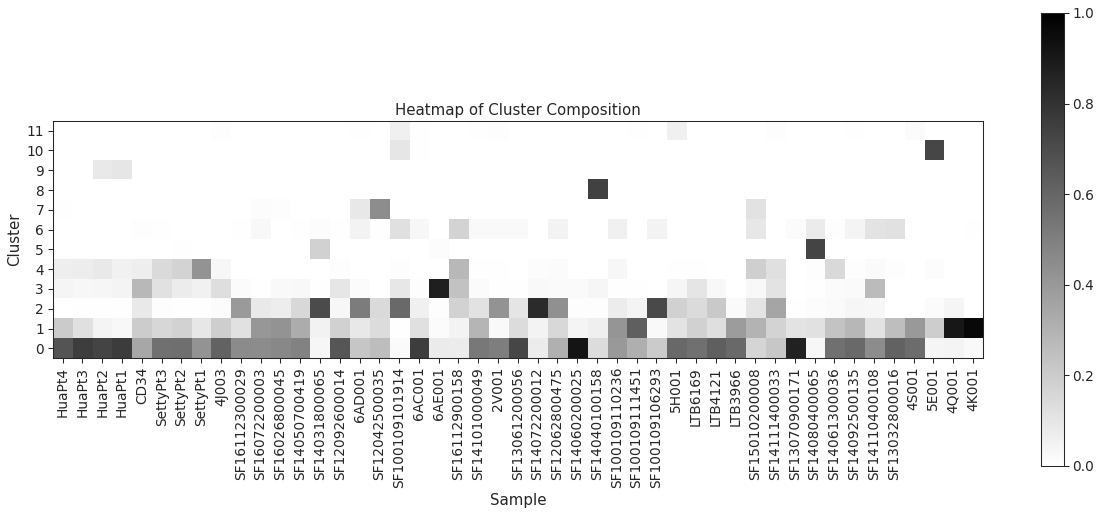

In [131]:
#Set figure size and resolution
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 75

fig, ax = plt.subplots(1,1)
num_rows, num_cols = orderedMatrix_transpose.shape

#Exclude first row (diff potential) to show only branch probablities (not diff potential)
img = ax.imshow(orderedMatrix_transpose,extent=[0,num_cols,0,num_rows], cmap = 'binary', clim=[0,1])

#add axis labels and title
plt.ylabel("Cluster")
plt.xlabel("Sample")
plt.title("Heatmap of Cluster Composition")

#label samples appropiately to match sample number and cell state
#y_label_str = map(str, orderingNoFirstSample)
x_label_list = namesList
y_label_list = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]

#Set label ticks
ax.set_xticks(np.linspace((num_cols-1),0,num_cols)+.5)
ax.set_yticks(np.linspace(0,11,12)+.5)

ax.set_yticklabels(y_label_list)
ax.set_xticklabels(x_label_list, rotation = 90, ha = "center")

fig.colorbar(img)

#Save figure
plt.savefig(filedir+'heatMapClusters_standard_pipeline_withHarmony_res=0.1_horizontal.pdf')

In [89]:
orderedMatrix

array([[2.54919499e-02, 9.64669052e-01, 0.00000000e+00, 4.47227191e-04,
        8.94454383e-04, 0.00000000e+00, 6.70840787e-03, 1.78890877e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.43780670e-02, 9.08256881e-01, 4.20311500e-02, 8.53424365e-04,
        2.13356091e-03, 0.00000000e+00, 4.26712183e-04, 2.13356091e-04,
        0.00000000e+00, 2.13356091e-04, 4.26712183e-04, 1.06678046e-03],
       [4.02985075e-02, 1.99004975e-01, 1.59203980e-02, 1.49253731e-03,
        1.34328358e-02, 0.00000000e+00, 9.95024876e-04, 4.97512438e-04,
        0.00000000e+00, 0.00000000e+00, 7.24875622e-01, 3.48258706e-03],
       [5.77369052e-01, 3.99840064e-01, 1.99920032e-03, 3.99840064e-04,
        3.99840064e-04, 7.99680128e-04, 3.99840064e-04, 3.99840064e-04,
        0.00000000e+00, 0.00000000e+00, 1.19952019e-03, 1.71931228e-02],
       [6.09605489e-01, 2.56946827e-01, 3.77358491e-03, 0.00000000e+00,
        1.13207547e-02, 0.00000000e+00, 1.17667238e-01, 6.86

In [90]:
orderedMatrix.transpose()

array([[2.54919499e-02, 4.43780670e-02, 4.02985075e-02, 5.77369052e-01,
        6.09605489e-01, 4.50247219e-01, 5.83916084e-01, 5.59740260e-01,
        3.47341338e-02, 8.63333333e-01, 2.19931271e-01, 1.65994081e-01,
        5.87824351e-01, 6.25318213e-01, 5.62145289e-01, 6.12174907e-01,
        5.93379447e-01, 2.04329775e-01, 3.15087146e-01, 4.00806747e-01,
        1.38148328e-01, 9.18897943e-01, 3.10727497e-01, 7.70204685e-02,
        7.23168424e-01, 5.06640752e-01, 5.28827519e-01, 7.80329201e-02,
        8.01141352e-02, 7.59646910e-01, 1.96078431e-02, 2.59474541e-01,
        2.25079413e-01, 6.62141195e-01, 3.67476852e-02, 4.88719068e-01,
        4.68104223e-01, 4.50097213e-01, 4.56962025e-01, 4.21778633e-01,
        5.66144848e-01, 5.58823529e-01, 3.45266508e-01, 7.61812715e-01,
        7.31777881e-01, 7.59805904e-01, 6.70714139e-01],
       [9.64669052e-01, 9.08256881e-01, 1.99004975e-01, 3.99840064e-01,
        2.56946827e-01, 1.14647713e-01, 2.84382284e-01, 2.36363636e-01,
       